# 2.2 금융 데이터 전처리&분석을 위한 판다스 pandas 사용법.

## 2.2.1. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('../data/us_etf_data/AAPL.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [3]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'int'>


In [4]:
type(df['Date'][0])

str

In [5]:
for col in df.columns:
    series = df[col]

In [6]:
series

0       117258400.0
1        43971200.0
2        26432000.0
3        21610400.0
4        18362400.0
           ...     
9710     26551000.0
9711     21124200.0
9712     21514000.0
9713     47735300.0
9714      9025362.0
Name: Volume, Length: 9715, dtype: float64

* parse_dates 매개변수를 사용하여 'Date' 컬럼을 timestamp타입으로 변환한다.
* index_col 매개변수를 사용하여 'Date' 컬럼을 dataframe의 index로 지정한다.

In [7]:
aapl_df = pd.read_csv('../data/us_etf_data/AAPL.csv',index_col='Date', parse_dates=['Date'])

In [8]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [9]:
print(aapl_df.head())
print(type(aapl_df.index))
print(type(aapl_df.index[0]))

                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.410525  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.389106   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.360548   26432000.0
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.369472   21610400.0
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.380182   18362400.0
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
print(type(aapl_df.index[0]))
print(type(aapl_df.index))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


## 2.2.2 에러의 주된 원인을 처리하자


* objective : Cleaning and preparing time series data
1. 누락데이터가 있는지 확인한다. 
  - 어떻게 확인하는가?
2. 누락 데이터는 fillna(method='ffill')

In [11]:
import pandas as pd
import numpy as np
s1 = pd.Series([1,np.nan,3,4,5])
s2 = pd.Series([1,2,np.nan,4,5])
s3 = pd.Series([1,2,3,np.nan,5])
df = pd.DataFrame({'S1':s1,
                  'S2':s2,
                  'S3':s3
                  })
df.head()

,S1,S2,S3
0,1.0,1.0,1.0
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0


In [12]:
df['S1'].isna()

0    False
1     True
2    False
3    False
4    False
Name: S1, dtype: bool

In [13]:
df.isna()

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [14]:
True == 1

True

In [15]:
False == 0

True

In [16]:
True == 0

False

In [17]:
False == 1

False

In [18]:
df.isna().sum()

S1    1
S2    1
S3    1
dtype: int64

In [19]:
df.count()

S1    4
S2    4
S3    4
dtype: int64

In [20]:
df.isna().count

<bound method DataFrame.count of       S1     S2     S3
0  False  False  False
1   True  False  False
2  False   True  False
3  False  False   True
4  False  False  False>

In [21]:
df.isin([np.nan])

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [22]:
df.isin([np.nan]).sum()

S1    1
S2    1
S3    1
dtype: int64

In [23]:
df.isnull()

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [24]:
df.isnull().sum()

S1    1
S2    1
S3    1
dtype: int64

In [25]:
df[df.isna().any(1)]

,S1,S2,S3
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN


In [26]:
df[df.isin([np.nan]).any(1)]

,S1,S2,S3
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN


In [27]:
df.fillna(0)

,S1,S2,S3
0,1.0,1.0,1.0
1,0.0,2.0,2.0
2,3.0,0.0,3.0
3,4.0,4.0,0.0
4,5.0,5.0,5.0


In [28]:
df.fillna(method='pad')

,S1,S2,S3
0,1.0,1.0,1.0
1,1.0,2.0,2.0
2,3.0,2.0,3.0
3,4.0,4.0,3.0
4,5.0,5.0,5.0


In [29]:
df.fillna(method='ffill')

,S1,S2,S3
0,1.0,1.0,1.0
1,1.0,2.0,2.0
2,3.0,2.0,3.0
3,4.0,4.0,3.0
4,5.0,5.0,5.0


In [30]:
df.fillna(method='bfill')

,S1,S2,S3
0,1.0,1.0,1.0
1,3.0,2.0,2.0
2,3.0,4.0,3.0
3,4.0,4.0,5.0
4,5.0,5.0,5.0


In [31]:
df.dropna(axis=0)

,S1,S2,S3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [32]:
df.dropna(axis='rows')

,S1,S2,S3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [33]:
df.dropna(axis=1)

""
0
1
2
3
4


In [34]:
df.dropna(axis='columns')

""
0
1
2
3
4


* 실제 종목 데이터로 확인해보자.

In [35]:
import pandas as pd
aapl_df = pd.read_csv('../data/us_etf_data\AAPL.csv',index_col='Date', parse_dates=['Date'])
# aapl_df.head()
aapl_df.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [36]:
import numpy as np
aapl_df[aapl_df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2.3가장 자주 쓰이는 데이터 선택방법(슬라이싱, 인덱싱, 서브셋 데이터 추출)

In [37]:
a = [0,1,2,3,4,5,6,7,8,9,10]
a[0:5]

[0, 1, 2, 3, 4]

In [38]:
import pandas as pd
df = pd.read_csv('../data/us_etf_data/AAPL.csv',index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [39]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


열단위 출력

In [40]:
df['Open'].head()

Date
1980-12-12    0.513393
1980-12-15    0.488839
1980-12-16    0.453125
1980-12-17    0.462054
1980-12-18    0.475446
Name: Open, dtype: float64

In [41]:
df['Open','High']

KeyError: ('Open', 'High')

In [42]:
df[['Open','High','Low','Close']].head()

,Open,High,Low,Close
Date,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393
1980-12-15,0.488839,0.488839,0.486607,0.486607
1980-12-16,0.453125,0.453125,0.450893,0.450893
1980-12-17,0.462054,0.464286,0.462054,0.462054
1980-12-18,0.475446,0.477679,0.475446,0.475446


In [43]:
df[0:3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0


In [44]:
df['2018-10-10':'2018-10-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-10,225.460007,226.350006,216.050003,216.360001,213.863373,41990600.0
2018-10-11,214.520004,219.500000,212.320007,214.449997,211.975418,53124400.0
2018-10-12,220.419998,222.880005,216.839996,222.110001,219.547028,40337900.0
2018-10-15,221.160004,221.830002,217.270004,217.360001,214.851822,30791000.0
2018-10-16,218.929993,222.990005,216.759995,222.149994,219.586548,29184000.0
2018-10-17,222.300003,222.639999,219.339996,221.190002,218.637650,22885400.0
2018-10-18,217.860001,219.740005,213.000000,216.020004,213.527298,32581300.0
2018-10-19,218.059998,221.259995,217.429993,219.309998,216.779327,33078700.0


In [45]:
import pandas as pd
df = pd.read_csv('../data/us_etf_data/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [46]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'int'>


#### loc와 iloc 인덱서

행 데이터 출력

In [47]:
df = pd.read_csv('../data/us_etf_data/AAPL.csv',index_col='Date', parse_dates=['Date'])
df.loc['1980-12-12']

Open         5.133930e-01
High         5.156250e-01
Low          5.133930e-01
Close        5.133930e-01
Adj Close    4.105250e-01
Volume       1.172584e+08
Name: 1980-12-12 00:00:00, dtype: float64

In [48]:
df.iloc[0]

Open         5.133930e-01
High         5.156250e-01
Low          5.133930e-01
Close        5.133930e-01
Adj Close    4.105250e-01
Volume       1.172584e+08
Name: 1980-12-12 00:00:00, dtype: float64

In [49]:
type(df.loc['1980-12-12'])

pandas.core.series.Series

In [50]:
df.index[0] == '1980-12-12'

False

In [51]:
# Key Error 발생. Key값이 일치 하지 않기 때문이다.
df.loc[['2018-10-10','2018-10-12'],'Open'] 

KeyError: "None of [Index(['2018-10-10', '2018-10-12'], dtype='object', name='Date')] are in the [index]"

In [52]:
# Type Error 발생. DataFrame에서 처리할 수 있는 Type으로 변환되지 않기 때문이다.
df.loc[['2018-10-10','2018-10-12']:'2018-10-20','Open']

TypeError: Cannot convert input [['2018-10-10', '2018-10-12']] of type <class 'list'> to Timestamp

In [53]:
df.loc['2018-10-10':'2018-10-20',['Open','High','Low','Close']]

,Open,High,Low,Close
Date,,,,
2018-10-10,225.460007,226.350006,216.050003,216.360001
2018-10-11,214.520004,219.500000,212.320007,214.449997
2018-10-12,220.419998,222.880005,216.839996,222.110001
2018-10-15,221.160004,221.830002,217.270004,217.360001
2018-10-16,218.929993,222.990005,216.759995,222.149994
2018-10-17,222.300003,222.639999,219.339996,221.190002
2018-10-18,217.860001,219.740005,213.000000,216.020004
2018-10-19,218.059998,221.259995,217.429993,219.309998


In [54]:
df.iloc[8000:8010,[0,1,2,3]]

,Open,High,Low,Close
Date,,,,
2012-08-28,96.425713,96.585716,95.809998,96.400002
2012-08-29,96.464287,96.809998,96.085716,96.209999
2012-08-30,95.805717,95.935715,94.692856,94.838570
2012-08-31,95.321426,95.514282,93.892860,95.034286
2012-09-04,95.108574,96.448570,94.928574,96.424286
2012-09-05,96.510002,96.621429,95.657143,95.747147
2012-09-06,96.167145,96.898575,95.828575,96.610001
2012-09-07,96.864288,97.497147,96.538574,97.205711
2012-09-10,97.207146,97.612854,94.585716,94.677139


ISO8601을 따르고 있기에 강력한 기능 <br/>
Although the default pandas datetime format is ISO8601 (“yyyy-mm-dd hh:mm:ss”) when selecting data using partial string indexing it understands a lot of other different formats.

http://sergilehkyi.com/tips-on-working-with-datetime-index-in-pandas/

In [55]:
df.loc['2016-11'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,113.459999,113.769997,110.529999,111.489998,106.680237,43825800.0
2016-11-02,111.400002,112.349998,111.230003,111.589996,106.775925,28331700.0
2016-11-03,110.980003,111.459999,109.550003,109.830002,105.631424,26932600.0
2016-11-04,108.529999,110.250000,108.110001,108.839996,104.679260,30837000.0
2016-11-07,110.080002,110.510002,109.459999,110.410004,106.189255,32560000.0


In [56]:
df.loc['2016-Nov-1':'2016-Nov-10'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,113.459999,113.769997,110.529999,111.489998,106.680237,43825800.0
2016-11-02,111.400002,112.349998,111.230003,111.589996,106.775925,28331700.0
2016-11-03,110.980003,111.459999,109.550003,109.830002,105.631424,26932600.0
2016-11-04,108.529999,110.250000,108.110001,108.839996,104.679260,30837000.0
2016-11-07,110.080002,110.510002,109.459999,110.410004,106.189255,32560000.0


In [57]:
df.loc['November 1, 2016':'November 10, 2016'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,113.459999,113.769997,110.529999,111.489998,106.680237,43825800.0
2016-11-02,111.400002,112.349998,111.230003,111.589996,106.775925,28331700.0
2016-11-03,110.980003,111.459999,109.550003,109.830002,105.631424,26932600.0
2016-11-04,108.529999,110.250000,108.110001,108.839996,104.679260,30837000.0
2016-11-07,110.080002,110.510002,109.459999,110.410004,106.189255,32560000.0


In [58]:
df.loc['2018-10-10':'2018-10-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-10,225.460007,226.350006,216.050003,216.360001,213.863373,41990600.0
2018-10-11,214.520004,219.500000,212.320007,214.449997,211.975418,53124400.0
2018-10-12,220.419998,222.880005,216.839996,222.110001,219.547028,40337900.0
2018-10-15,221.160004,221.830002,217.270004,217.360001,214.851822,30791000.0
2018-10-16,218.929993,222.990005,216.759995,222.149994,219.586548,29184000.0
2018-10-17,222.300003,222.639999,219.339996,221.190002,218.637650,22885400.0
2018-10-18,217.860001,219.740005,213.000000,216.020004,213.527298,32581300.0
2018-10-19,218.059998,221.259995,217.429993,219.309998,216.779327,33078700.0


## 2.2.4 금융 시계열 데이터 분석에 유용한 pandas 함수들

#### Shifting and lags
우리는 원하는 시간 주기로 간격만큼 index를 shift할 수 있다. <br/>
shift 함수는 pandas를 이용할때 다양한 곳에서 유용하게 사용된다. 다른 시간의 시계열 데이터와 비교할 때 유용하다.<br/>


In [59]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [60]:
aapl_df['Close_lag1'] = aapl_df['Close'].shift(1) 

In [61]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,Close_lag1
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054


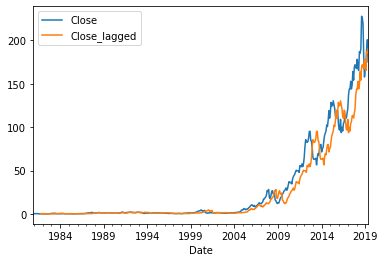

In [63]:
aapl_df['Close'].asfreq('M',method='ffill').plot(legend=True)
shifted = aapl_df['Close'].asfreq('M',method='ffill').shift(10).plot(legend = True)
shifted.legend(['Close','Close_lagged'])

#### 1.9 Percent change

우리는 금융시계열을 다루니 하루하루 주가가 어느정도 변동하는지 간단하게 살펴보자.

In [64]:
aapl_df['pct_change'] = aapl_df['Close'].pct_change()

In [65]:
aapl_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_lag1,pct_change
Date,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393,-0.052174
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607,-0.073394
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893,0.024753
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054,0.028984
1980-12-19,0.504464,0.506696,0.504464,0.504464,0.403385,12157600.0,0.475446,0.061033
1980-12-22,0.529018,0.531250,0.529018,0.529018,0.423019,9340800.0,0.504464,0.048673
1980-12-23,0.551339,0.553571,0.551339,0.551339,0.440868,11737600.0,0.529018,0.042193
1980-12-24,0.580357,0.582589,0.580357,0.580357,0.464072,12000800.0,0.551339,0.052632


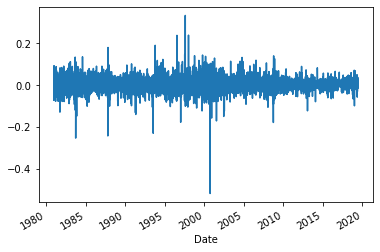

In [66]:
aapl_df['Close'].pct_change().plot()

#### Diff

In [67]:
aapl_df['Close_diff'] = aapl_df['Close'].diff()

In [68]:
# aapl_df['Close'].shift()

Date
1980-12-12         NaN
1980-12-15   -0.026786
1980-12-16   -0.035714
1980-12-17    0.011161
1980-12-18    0.013392
Name: Close, dtype: float64


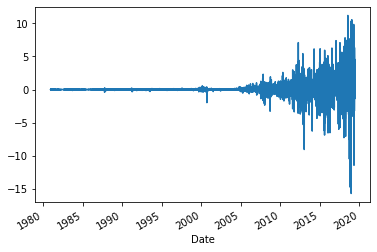

In [69]:
print(aapl_df['Close'].diff().head())
aapl_df['Close'].diff().plot()

Date
1980-12-12         NaN
1980-12-15   -0.052174
1980-12-16   -0.073394
1980-12-17    0.024753
1980-12-18    0.028984
Name: Close, dtype: float64


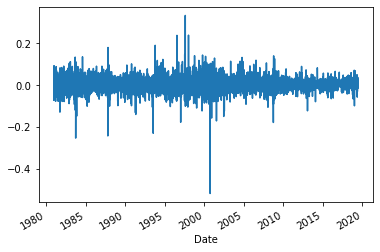

In [70]:
print((aapl_df['Close'] /aapl_df['Close'].shift(1) -1).head())
(aapl_df['Close'] /aapl_df['Close'].shift(1) -1).plot()

Date
1980-12-12         NaN
1980-12-15   -0.052174
1980-12-16   -0.073394
1980-12-17    0.024753
1980-12-18    0.028984
Name: Close, dtype: float64


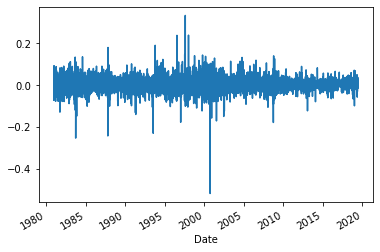

In [71]:
print((aapl_df['Close'].diff() /aapl_df['Close'].shift(1)).head())
(aapl_df['Close'].diff() /aapl_df['Close'].shift(1)).plot()

#### Rolling

In [72]:
aapl_df['MA'] = aapl_df['Close'].rolling(window = 5).mean()

In [73]:
aapl_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_lag1,pct_change,Close_diff,MA
Date,,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN,NaN,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393,-0.052174,-0.026786,NaN
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607,-0.073394,-0.035714,NaN
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893,0.024753,0.011161,NaN
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054,0.028984,0.013392,0.477679
1980-12-19,0.504464,0.506696,0.504464,0.504464,0.403385,12157600.0,0.475446,0.061033,0.029018,0.475893
1980-12-22,0.529018,0.531250,0.529018,0.529018,0.423019,9340800.0,0.504464,0.048673,0.024554,0.484375
1980-12-23,0.551339,0.553571,0.551339,0.551339,0.440868,11737600.0,0.529018,0.042193,0.022321,0.504464
1980-12-24,0.580357,0.582589,0.580357,0.580357,0.464072,12000800.0,0.551339,0.052632,0.029018,0.528125


In [74]:
type(aapl_df['Close'].rolling(window = 5))

pandas.core.window.rolling.Rolling

#### Resampling

* Upsampling : 시계열을 Low frequency에서 high frequency로 변환한다. 누란된 데이터를 채우거나 보간하는 방법을 포함한다. (월간 -> 일)

* Downsampling : 시계열을 high frequency에서 low frequency로 변환한다. 기존 데이터를 집계하는 것을 포함.(주간 -> 월 ) or (일간 -> 주간)

=> 하지만 금융시계열 같은 경우는 각 시간 데이터가 중요하기에 Downsampling을 살펴보겠다

In [75]:
import pandas as pd
index = pd.date_range(start = '2019-01-01',end= '2019-10-01',freq='B')
series = pd.Series(range(len(index)), index=index)


In [76]:
series.resample(rule='M').sum()

2019-01-31     253
2019-02-28     650
2019-03-31    1113
2019-04-30    1639
2019-05-31    2231
2019-06-30    2370
2019-07-31    3220
2019-08-31    3575
2019-09-30    3864
2019-10-31     195
Freq: M, dtype: int64

In [77]:
series.resample(rule='M').last()

2019-01-31     22
2019-02-28     42
2019-03-31     63
2019-04-30     85
2019-05-31    108
2019-06-30    128
2019-07-31    151
2019-08-31    173
2019-09-30    194
2019-10-31    195
Freq: M, dtype: int64

In [78]:
series.resample(rule='MS').first()

2019-01-01      0
2019-02-01     23
2019-03-01     43
2019-04-01     64
2019-05-01     86
2019-06-01    109
2019-07-01    129
2019-08-01    152
2019-09-01    174
2019-10-01    195
Freq: MS, dtype: int64

### 2장 Pandas 끝